In [8]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from matplotlib import cm
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools
import glob 

In [3]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_outfall_20180101_20191231.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
data = data.assign_coords(time = time_values)
data

<xarray.Dataset>
Dimensions:  (time: 24, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2019-11' '2019-12'
Data variables:
    outfall  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_outfall_20180101_20191231
    description:  Month-averaged Outfall extracted from SalishSeaCast v202111...
    history:      2023-11-17 15:12 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [4]:
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [5]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mesh_mask_depth_var='gdept_0'
thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
depth = mesh.variables[mesh_mask_depth_var][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

In [6]:
month_names = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",

    13: "January",
    14: "February",
    15: "March",
    16: "April",
    17: "May",
    18: "June",
    19: "July",
    20: "August",
    21: "September",
    22: "October",
    23: "November",
    24: "December"
}

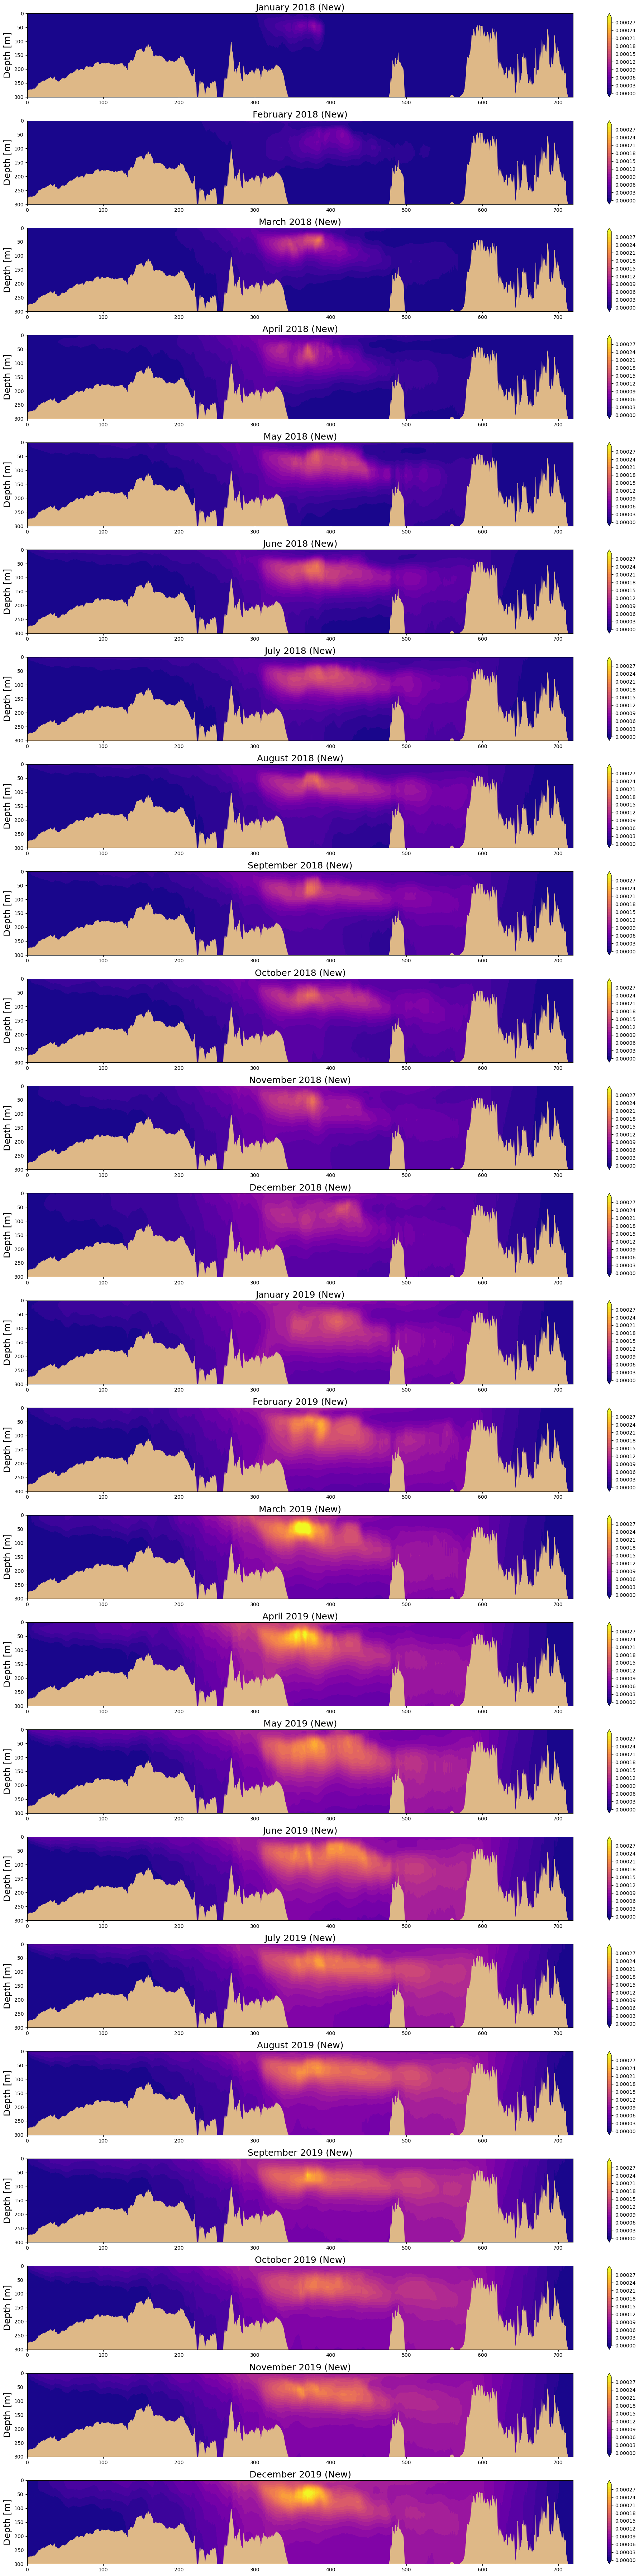

In [26]:
fig, axs = plt.subplots(24, 1, figsize=(20, 72))
jp = 0
for month in range(1, 24+1):
    dep_thal, distance, var_thal = vis.load_thalweg(
                depth[0, ...], np.array(data.outfall[month-1]), bathy['nav_lon'][:], bathy['nav_lat'][:],
                thalweg_pts)
    var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg_pts)
    colours = axs[jp].contourf(distance, dep_thal, var_plot, np.arange(0, 0.0003, 0.00001), 
                                     cmap='plasma', extend='both')
    #axs[jp].contour(distance, dep_thal, var_plot, [2e-5, 1e-4], colors='green')
    vis._add_bathy_patch(
            distance, bathy['Bathymetry'][:], thalweg_pts, axs[jp], color='burlywood')
    cbar = fig.colorbar(colours, ax=axs[jp])
    axs[jp].invert_yaxis()
    axs[jp].set_ylim(300, 0)
    axs[jp].set_ylabel('Depth [m]', fontsize = 18)
    if month > 12:
        axs[jp].set_title(f'{month_names[month]} 2019 (New)', fontsize = 18)
    else:
        axs[jp].set_title(f'{month_names[month]} 2018 (New)', fontsize = 18)
    jp = jp + 1
fig.tight_layout()